

# Probabilistic Principal Component Analysis (PPCA) on Digits Dataset

This code implements PPCA by two methods:
1. ML solution using spectral decomposition.
2. EM algorithm for PPCA.

Note: The data is loaded from the UCI "Optical Recognition of Handwritten Digits"
      dataset (file: opdigits.tes). This dataset contains 1797 samples, each with
      64 features (the last column is the digit label), which is equivalent to
      sklearn.datasets.load_digits.




## Data Loading
Load the digits dataset.

In [1]:

# -----------------------------
# 1. Data Loading
# -----------------------------
# Download and load the digits dataset from UCI.

digits_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes"
if (!file.exists("optdigits.tes")) {
  download.file(digits_url, destfile = "optdigits.tes")
}


In [2]:

# Read the data (comma-separated): first 64 columns are features, the 65th column is label.
digits_data <- read.table("optdigits.tes", sep = ",", header = FALSE)
X <- as.matrix(digits_data[, 1:64])
y <- digits_data[, 65]

cat("X shape:", dim(X), "\n")           # Should be (1797, 64)
cat("Unique labels:", sort(unique(y)), "\n")  # Expected: 0-9


X shape: 1797 64 
Unique labels: 0 1 2 3 4 5 6 7 8 9 


In [3]:


Xtrain <- X
ytrain <- y


pdf 
  2

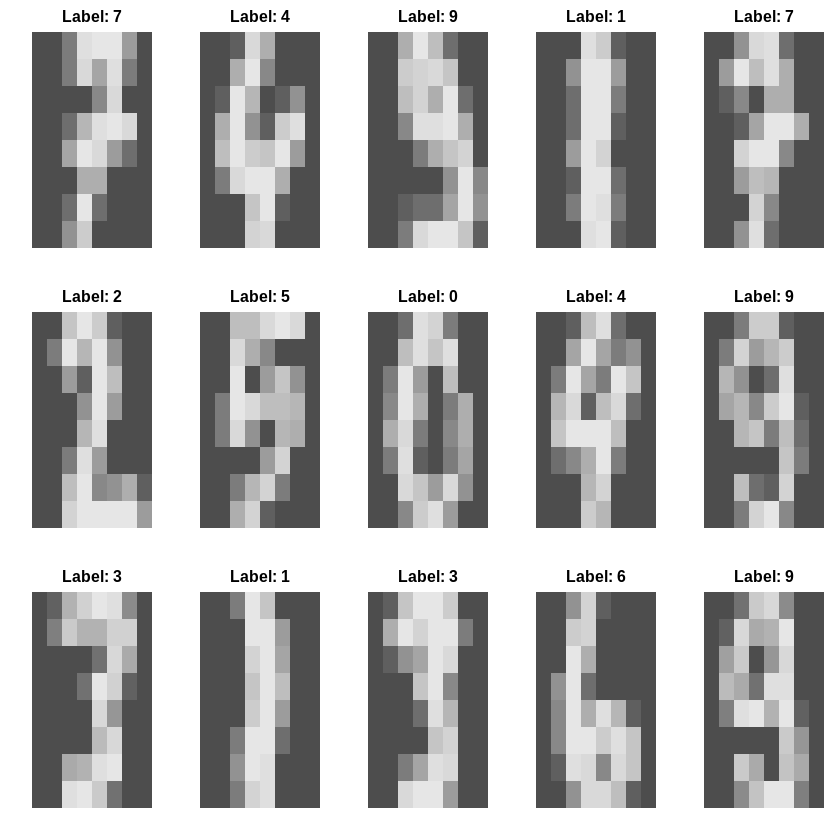

In [4]:
# Function to visualize random digit samples
visualize_digits <- function(X, y, n_samples=15, random_state=42) {
  set.seed(random_state)
  indices <- sample(1:nrow(X), n_samples, replace = FALSE)
  n_cols <- 5
  n_rows <- ceiling(n_samples / n_cols)
  par(mfrow=c(n_rows, n_cols), mar=c(2, 2, 2, 1))

  for (i in 1:n_samples) {
    # 创建8x8矩阵并转置，使数字显示正确方向
    digit_image <- t(matrix(X[indices[i], ], nrow=8, ncol=8, byrow=TRUE))
    # 翻转图像以确保正确的方向
    image(digit_image[, ncol(digit_image):1],
          col=gray.colors(256),
          axes=FALSE)
    title(main=paste("Label:", y[indices[i]]))
  }
}

visualize_digits(X, y, n_samples=15)
# save the plot to a pdf
pdf("digits_visualization.pdf")
visualize_digits(X, y, n_samples=15)
dev.off()


## ML PPCA
Compute ML estimates using spectral decomposition and project the data to a lower-dimensional space.



In [5]:
#(a)compute sample mean and sample cov
s_mean <- colMeans(Xtrain)
s_cov <- cov(Xtrain)
print(s_mean)
print(s_cov)

          V1           V2           V3           V4           V5           V6 
 0.000000000  0.303839733  5.204785754 11.835837507 11.848080134  5.781858653 
          V7           V8           V9          V10          V11          V12 
 1.362270451  0.129660545  0.005564830  1.993878687 10.382303840 11.979410128 
         V13          V14          V15          V16          V17          V18 
10.279354480  8.175848637  1.846410684  0.107957707  0.002782415  2.601558152 
         V19          V20          V21          V22          V23          V24 
 9.903171953  6.992765721  7.097941013  7.806343907  1.788536450  0.050083472 
         V25          V26          V27          V28          V29          V30 
 0.001112966  2.469671675  9.091263216  8.821368948  9.927100723  7.551474680 
         V31          V32          V33          V34          V35          V36 
 2.317751809  0.002225932  0.000000000  2.339454647  7.667223150  9.071786311 
         V37          V38          V39          V40 

In [14]:
#(b)Perform spectral decomposition of the sample covariance matrix.
eig <- eigen(s_cov)
lambda <- eig$values ## eigenvalues
U <- eig$vectors ## eigenvectors
print(lambda)
print(U)

 [1]  1.790069e+02  1.637177e+02  1.417884e+02  1.011004e+02  6.951317e+01
 [6]  5.910852e+01  5.188454e+01  4.401511e+01  4.031100e+01  3.701180e+01
[11]  2.851904e+01  2.732117e+01  2.190149e+01  2.132436e+01  1.763672e+01
[16]  1.694686e+01  1.585139e+01  1.500446e+01  1.223447e+01  1.088686e+01
[21]  1.069357e+01  9.582598e+00  9.226403e+00  8.690369e+00  8.365612e+00
[26]  7.165780e+00  6.919739e+00  6.192955e+00  5.884991e+00  5.155867e+00
[31]  4.491297e+00  4.246878e+00  4.047439e+00  3.943403e+00  3.706472e+00
[36]  3.531653e+00  3.084574e+00  2.737800e+00  2.672109e+00  2.541706e+00
[41]  2.282987e+00  1.907242e+00  1.817166e+00  1.689964e+00  1.401972e+00
[46]  1.292219e+00  1.158934e+00  9.312200e-01  6.698506e-01  4.860652e-01
[51]  2.523504e-01  9.915279e-02  6.313078e-02  6.073776e-02  3.966623e-02
[56]  1.495056e-02  8.473073e-03  3.623660e-03  1.277051e-03  6.612709e-04
[61]  4.122233e-04  0.000000e+00 -5.089712e-16 -1.157017e-15
               [,1]          [,2]      

In [15]:
#(c)Compute \sigma^2 and W， （M=2）
M=2
lambda_M <- lambda[1:M]
U_M <- U[, 1:M]
print(lambda_M)
print(U_M)



[1] 179.0069 163.7177
               [,1]          [,2]
 [1,]  0.000000e+00  0.000000e+00
 [2,] -1.730947e-02  1.010646e-02
 [3,] -2.234288e-01  4.908492e-02
 [4,] -1.359133e-01  9.433375e-03
 [5,] -3.303231e-02  5.360156e-02
 [6,] -9.663408e-02  1.177553e-01
 [7,] -8.329438e-03  6.212818e-02
 [8,]  2.269001e-03  7.935746e-03
 [9,] -3.205165e-04  1.632163e-04
[10,] -1.193089e-01  2.101671e-02
[11,] -2.444517e-01 -6.034857e-02
[12,]  1.485127e-01  5.337696e-03
[13,] -4.673194e-02  9.197692e-02
[14,] -2.177407e-01  5.192105e-02
[15,] -1.481368e-02  5.893547e-02
[16,]  4.477795e-03  3.332834e-03
[17,] -4.941364e-05  4.228721e-05
[18,] -7.954194e-02 -3.624585e-02
[19,]  8.339515e-02 -1.982573e-01
[20,]  2.159153e-01  4.863866e-02
[21,] -1.721268e-01  2.255749e-01
[22,] -1.637121e-01  4.505419e-03
[23,]  2.864445e-02 -2.676967e-02
[24,]  4.232518e-03  2.087357e-04
[25,]  9.854886e-05  5.662340e-05
[26,]  6.423191e-02 -7.712351e-02
[27,]  2.540933e-01 -1.884471e-01
[28,] -3.567710e-02  1.379

In [21]:
D = 64
sigma2_ml <- mean(lambda[(M + 1):D])
sigma2_ml

[1] 13.86166

In [27]:
W_ML <- U_M %*% sqrt(diag(lambda_M) - sigma2_ml*diag(2))
W_ML

0.000000000,0.0000000000
-0.222441961,0.1237189193
-2.871258459,0.6008765878
-1.746606365,0.1154793384
-0.424494437,0.6561674001
-1.241833592,1.4415102007
-0.107040658,0.7605465786
0.029158671,0.0971460034
-0.004118921,0.0019980236
-1.533225118,0.2572775240
-3.141420589,-0.7387613492



## EM Algorithm Implementation for PPCA




## Task4

The following code show example how to using standard PCA extract the latent embeddings and project the latent embeddings using t-SNE.

In [ ]:
# Check if the Rtsne package is installed
if (!requireNamespace("Rtsne", quietly = TRUE)) {
  # Install the Rtsne package if it's not already installed
  install.packages("Rtsne")
}

 [1] "Variance explained by PCA components:  28.5093648236993"
 [2] "Variance explained by PCA components:  54.4963526726898"
 [3] "Variance explained by PCA components:  63.7292500006396"
 [4] "Variance explained by PCA components:  73.8226768845953"
 [5] "Variance explained by PCA components:  80.2895776104032"
 [6] "Variance explained by PCA components:  83.5305336403744"
 [7] "Variance explained by PCA components:  86.2588384427105"
 [8] "Variance explained by PCA components:  89.4303116598526"
 [9] "Variance explained by PCA components:  95.9085404245717"
[10] "Variance explained by PCA components:  98.8202733661143"


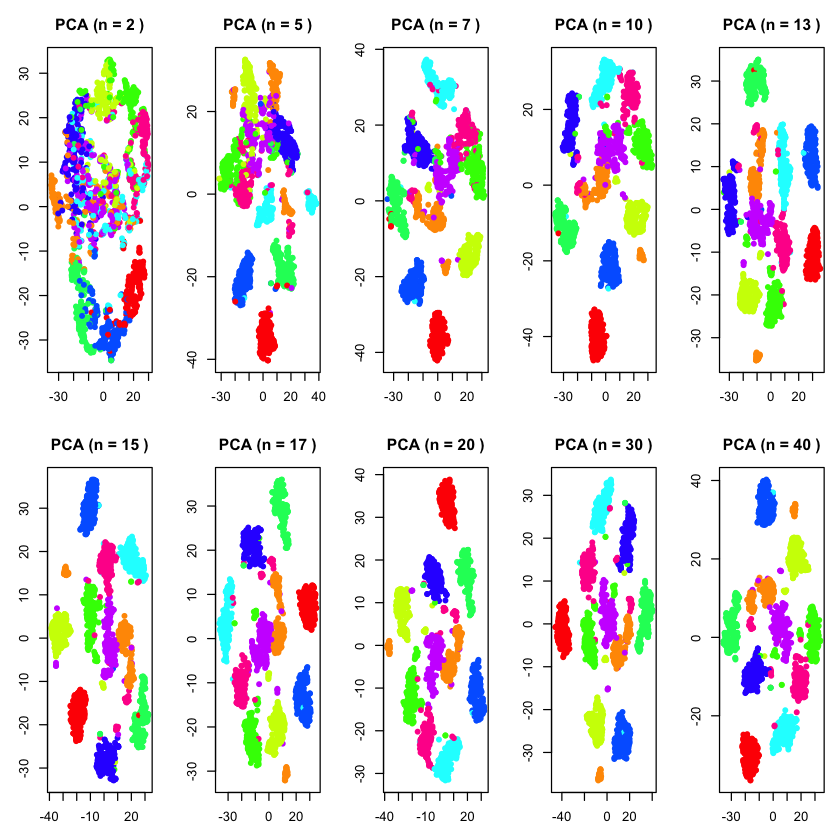

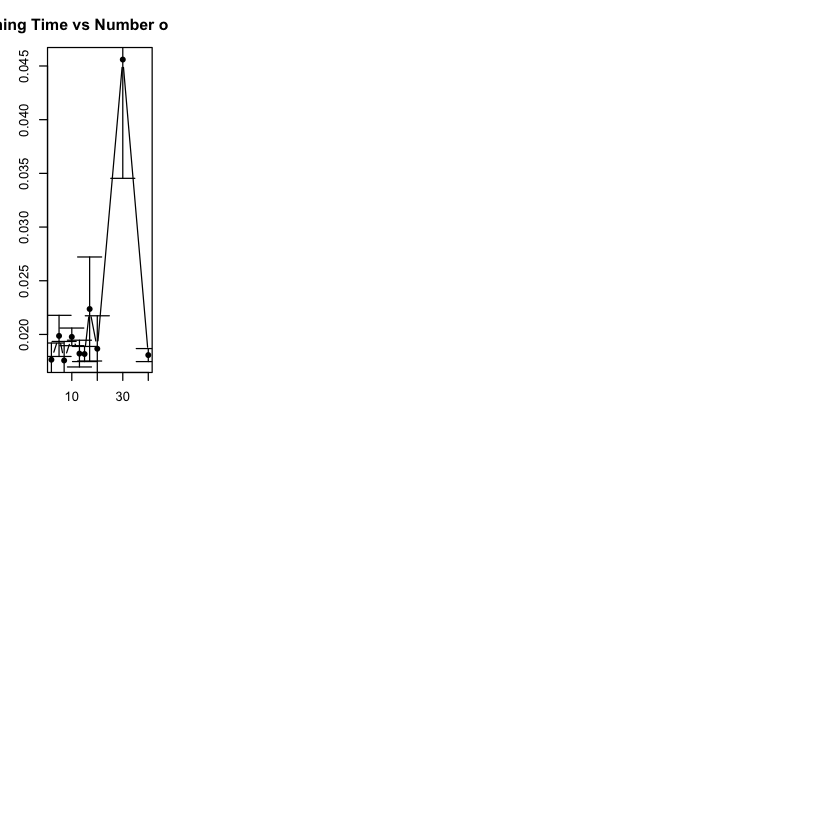

In [ ]:
# Load required libraries
library(MASS)       # for SVD decomposition
library(Rtsne)      # for t-SNE
library(ggplot2)    # for plotting

# Function to run PCA once
run_pca_once <- function(X, n_comp) {
  start_time <- Sys.time()
  pca <- prcomp(X, center = TRUE, scale. = FALSE)
  Z <- pca$x[, 1:n_comp]
  end_time <- Sys.time()
  time_taken <- as.numeric(difftime(end_time, start_time, units = "secs"))
  return(list(time_taken = time_taken, pca = pca, Z = Z))
}

# Compare PCA results and visualize projections using t-SNE for different component numbers
compare_svd_pca_components <- function(X, y, components_list = c(2, 5, 10, 20), n_runs = 3) {
  n_plots <- length(components_list)
  n_cols <- 5
  n_rows <- ceiling(n_plots / n_cols)

  # Set up plotting grid
  par(mfrow = c(n_rows, n_cols), mar = c(3, 3, 3, 1))

  running_times <- numeric(length(components_list))
  running_times_std <- numeric(length(components_list))
  var_explaineds <- numeric(length(components_list))

  for (idx in 1:length(components_list)) {
    n_comp <- components_list[idx]

    # Run PCA multiple times
    times <- numeric(n_runs)
    for (run in 1:n_runs) {
      result <- run_pca_once(X, n_comp)
      times[run] <- result$time_taken
    }

    # Calculate mean and standard deviation of running times
    mean_time <- mean(times)
    std_time <- sd(times)
    running_times[idx] <- mean_time
    running_times_std[idx] <- std_time

    # Visualize using t-SNE
    pca_result <- run_pca_once(X, n_comp)
    Z_2d <- Rtsne(pca_result$Z)$Y  # t-SNE transformation

    # Plot t-SNE visualization
    plot(Z_2d, col = rainbow(10)[y + 1], pch = 16, main = paste("PCA (n =", n_comp, ")"), xlab = "t-SNE 1", ylab = "t-SNE 2")
    var_explaineds[idx] <- sum(pca_result$pca$sdev[1:n_comp]^2) / sum(pca_result$pca$sdev^2) * 100
  }

  # Plot running times with error bars
  plot(components_list, running_times, type = "b", pch = 16, xlab = "Number of Components", ylab = "Time (s)",
       main = "PCA Running Time vs Number of Components")
  arrows(components_list, running_times - running_times_std, components_list, running_times + running_times_std, angle = 90, code = 3, length = 0.1)

  # Display variance explained for each component number
  print(paste("Variance explained by PCA components: ", var_explaineds))
}

# Use previously loaded X and y data
components_to_try <- c(2, 5, 7, 10, 13, 15, 17, 20, 30, 40)
compare_svd_pca_components(X, y, components_list = components_to_try)

### ML PPCA

In the following part, your just need to using your implementation of ML PPCA to extract the latent embedding Z and estimate other parameters in function `run_mlppca_once`

In [ ]:
# Function to run ML-PPCA once and record time
run_mlppca_once <- function(X, n_comp) {
  start_time <- Sys.time()
  # Your code here
  # some code here
  # mu <-
  # W_ml <-
  # sigma2_ml <-
  # Z <-

  end_time <- Sys.time()
  time_taken <- as.numeric(difftime(end_time, start_time, units = "secs"))

  return(list(
    time_taken = time_taken,
    Z = Z,
    W = W_ml,
    sigma2 = sigma2_ml,
    mu = mu
  ))
}



In [ ]:
# Compare ML-PPCA results with different components
compare_mlpca_components <- function(X, y, components_list = c(2, 5, 10, 20), n_runs = 3) {
  n_plots <- length(components_list)
  n_cols <- 5
  n_rows <- ceiling(n_plots / n_cols)

  # Set up plotting grid
  par(mfrow = c(n_rows, n_cols), mar = c(3, 3, 3, 1))

  running_times <- numeric(length(components_list))
  running_times_std <- numeric(length(components_list))

  for (idx in 1:length(components_list)) {
    n_comp <- components_list[idx]

    # Run multiple times and record times
    times <- numeric(n_runs)
    for (run in 1:n_runs) {
      result <- run_mlppca_once(X, n_comp)
      times[run] <- result$time_taken
    }

    # Calculate mean and std
    mean_time <- mean(times)
    std_time <- sd(times)
    running_times[idx] <- mean_time
    running_times_std[idx] <- std_time

    # Visualize with t-SNE
    ml_ppca_result <- run_mlppca_once(X, n_comp)
    Z_2d <- Rtsne(ml_ppca_result$Z)$Y

    # Plot
    plot(Z_2d, col = rainbow(10)[y + 1], pch = 16,
         main = paste("ML-PPCA (n =", n_comp, ")"),
         xlab = "Component 1", ylab = "Component 2")
  }

  # Plot running times with error bars
  plot(components_list, running_times, type = "b", pch = 16,
       xlab = "Number of Components", ylab = "Running Time (s)",
       main = "ML-PPCA Running Time vs Number of Components")
  arrows(components_list, running_times - running_times_std,
         components_list, running_times + running_times_std,
         angle = 90, code = 3, length = 0.1)

  # Display results
  print(paste("Running times for ML-PPCA components:",
              paste(running_times, collapse = ", ")))
}


In [ ]:
components_to_try <- c(2, 5, 7, 10, 13, 15, 17, 20, 30, 40)
# set the number of runs to 1 for debugging and set the number of components to 3 for final submission
compare_mlpca_components(X, y, components_list = components_to_try,n_runs=1,)

### PPCA-EM

In the following code, you just need to use your implement of EM PPCA to extract the latent embedding Z and record the log-likelihood values during iterations in function `run_ppca_em_once`

In [ ]:
# Function to run PPCA-EM once and record time/convergence
run_ppca_em_once <- function(X, n_comp, n_iter, seed = NULL) {
  start_time <- Sys.time()

  # Your code here
  Q_history <-
  W <-
  sigma2 <-
  # Get final projection
  Z <-   # Transpose to get (N x M)

  end_time <- Sys.time()
  time_taken <- as.numeric(difftime(end_time, start_time, units = "secs"))

  return(list(
    time_taken = time_taken,
    Z = Z,
    W = W,
    sigma2 = sigma2,
    Q_history = Q_history
  ))
}



In [ ]:

# Compare PPCA-EM results with different components
compare_ppca_em_components <- function(X, y, components_list = c(2, 5, 10, 20),
                                     n_runs = 3, n_iter = 30) {
  n_plots <- length(components_list)
  n_cols <- 5
  n_rows <- ceiling(n_plots / n_cols)

  # Set up plotting grid
  par(mfrow = c(n_rows, n_cols), mar = c(3, 3, 3, 1))

  running_times <- numeric(length(components_list))
  running_times_std <- numeric(length(components_list))
  convergence_iters <- numeric(length(components_list))
  convergence_iters_std <- numeric(length(components_list))

  for (idx in 1:length(components_list)) {
    n_comp <- components_list[idx]

    # Run multiple times and record metrics
    times <- numeric(n_runs)
    iters <- numeric(n_runs)
    for (run in 1:n_runs) {
      result <- run_ppca_em_once(X, n_comp, n_iter, seed = 42 + run)
      times[run] <- result$time_taken
      iters[run] <- length(result$Q_history) - 1
    }

    # Calculate statistics
    mean_time <- mean(times)
    std_time <- sd(times)
    mean_iters <- mean(iters)
    std_iters <- sd(iters)

    running_times[idx] <- mean_time
    running_times_std[idx] <- std_time
    convergence_iters[idx] <- mean_iters
    convergence_iters_std[idx] <- std_iters

    # Visualize with t-SNE
    ppca_result <- run_ppca_em_once(X, n_comp, n_iter)
    Z_2d <- Rtsne(ppca_result$Z)$Y

    # Plot
    plot(Z_2d, col = rainbow(10)[y + 1], pch = 16,
         main = paste("PPCA EM (n =", n_comp, ")"),
         xlab = "Component 1", ylab = "Component 2")
  }

  # Plot running times with error bars
  plot(components_list, running_times, type = "b", pch = 16,
       xlab = "Number of Components", ylab = "Running Time (s)",
       main = "PPCA EM Running Time vs Number of Components")
  arrows(components_list, running_times - running_times_std,
         components_list, running_times + running_times_std,
         angle = 90, code = 3, length = 0.1)

  # Display results
  print(paste("Running times for PPCA-EM components:",
              paste(running_times, collapse = ", ")))
  print(paste("Average iterations for convergence:",
              paste(convergence_iters, collapse = ", ")))
}

In [ ]:
components_to_try <- c(2, 5, 7, 10, 13, 15, 17, 20, 30, 40)
# set the number of runs to 1 for debugging and set the number of components to 3 for final submission
compare_ppca_em_components(X, y, components_to_try, n_runs =1, n_iter = 50)